## Problem Statement 1:
Is gender independent of education level? A random sample of 395 people were surveyed and each person was asked to report the highest education level they obtained. The data that resulted from the survey is summarized in the following table:
High School Bachelors Masters Ph.d. Total
Female 60
54
46
41
201
Male 40
44
53
57
194
Total 100
98
99
98
395
Question: Are gender and education level dependent at 5% level of significance? In other words, given the data collected above, is there a relationship between the gender of an individual and the level of education that they have obtained?

H0:-Null Hypothesis:The two categorical variables gender and education level are independent(Zero variance within group)
Ha:-Alternate Hypothesis:The two categorical variables gender and education level have a relationship(Significant variance within groups)

In [12]:
import numpy as np
import pandas as pd
Female=[60,54,46,41]
Male=[40,44,53,57]
Cont = np.array([Female,Male])
Cont

array([[60, 54, 46, 41],
       [40, 44, 53, 57]])

In [13]:
from scipy import stats

stats.chi2_contingency(Cont)

(8.006066246262538,
 0.045886500891747214,
 3,
 array([[50.88607595, 49.86835443, 50.37721519, 49.86835443],
        [49.11392405, 48.13164557, 48.62278481, 48.13164557]]))

In [10]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(Cont)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
8.006066246262538


===Degrees of Freedom===
3


===P-Value===
0.045886500891747214


===Contingency Table===
[[50.88607595 49.86835443 50.37721519 49.86835443]
 [49.11392405 48.13164557 48.62278481 48.13164557]]


In [11]:
stats.chi2.ppf(0.95,3)

7.814727903251179

Chi_2stat=8.006 > Chi2_Critical(.95)=7.814 hence we reject the null hypothesis that gender and education level has no relation.
Accept Ha:-The two categorical variables gender and education level have a relationship.

In [ ]:
#-----------------------------------------------#

## Problem Statement 2:
Using the following data, perform a oneway analysis of variance using α=.05. Write up the results in APA format.
[Group1: 51, 45, 33, 45, 67]
[Group2: 23, 43, 23, 43, 45]
[Group3: 56, 76, 74, 87, 56]

In [ ]:
H0:-Null hypotheses: Groups means are equal (no variation in means of groups) m1=m2=m3
Ha:-Alternative hypotheses: At least, one group mean is different from other groups m1!=m2!=m3

In [2]:
import numpy as np
import pandas as pd
g1=[51,45,33,45,67]
g2=[23,43,23,43,45]
g3=[56,76,74,87,56]
Cont = np.array([g1,g2,g3])
Cont

array([[51, 45, 33, 45, 67],
       [23, 43, 23, 43, 45],
       [56, 76, 74, 87, 56]])

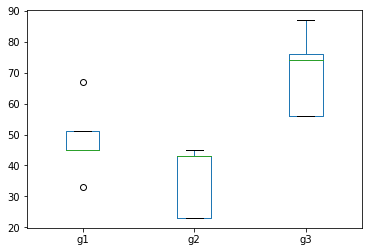

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
one=pd.DataFrame({'g1': [51, 45, 33, 45, 67]})
two=pd.DataFrame({'g2': [23, 43, 23, 43, 45]})
three=pd.DataFrame({'g3': [56,76,74,87,56]})
Gp=pd.concat([one,two,three],axis=1)
Gp
Gp.boxplot(column=['g1','g2','g3'], grid=False)

In [4]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(Gp['g1'], Gp['g2'],Gp['g3'])
print(fvalue, pvalue)

9.747205503009463 0.0030597541434430556


In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
# reshape the d dataframe suitable for statsmodels package 
Gp_melt = pd.melt(Gp.reset_index(), id_vars=['index'],value_vars=['g1', 'g2', 'g3'])
# replace column names
Gp_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=Gp_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3022.933333,2.0,9.747206,0.00306
Residual,1860.800000,12.0,NaN,NaN


In [20]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=Gp_melt['value'], groups=Gp_melt['treatments'], alpha=0.05)
print(m_comp)

Below results from Tukey HSD suggests that except g1-g2, all other pairwise comparisons for treatments rejects null hypothesis and
indicates statistical significant differences.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  g1     g2    -12.8   -33.801 8.201  False 
  g1     g3     21.6    0.599  42.601  True 
  g2     g3     34.4    13.399 55.401  True 
--------------------------------------------


In [5]:
Test of Assumptions Involved in the Hypothesis 
----------------------------------------------
Levene test can be used to check the Homogeneity of variances. 
Null hypothesis: samples from populations have equal variances.
Below case we cannot reject the null hypothesis as the p-value is non-significant

# load packages
import scipy.stats as stats
w, pvalue = stats.levene(Gp['g1'], Gp['g2'],Gp['g3'])
print(w, pvalue)

0.07518248175182476 0.9280076096504267


In [18]:
The Shapiro-Wilk test can be used to check the normal distribution of residuals .
Null hypothesis: data is drawn from normal distribution.

# load packages
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9127094745635986 0.14900249242782593


In [ ]:
Pvalue=.003 < .05 hence we reject the null hypothesis 
Accept Ha :At least, one group mean is different from other groups m1!=m2!=m3

In [ ]:
#--------------------------------------------------------#

## Problem Statement 3:
Calculate F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25.
For 10, 20, 30, 40, 50:

In [1]:
import scipy.stats as stats

a=[10,20,30,40,50]
b=[5,10,15,20,25]

In [2]:
from statistics import stdev
VarA=stdev(a)**2
VarB=stdev(b)**2
F=VarA/VarB

print("Variance of A :",VarA)
print("Variance of B :",VarB)
print("F-stats value (a,b) is: ", F)


Variance of A : 250.0
Variance of B : 62.5
F-stats value (a,b) is:  4.0


Note:=> F-one way test not applicable in this specific case having just 2 groups and hence the direct variance ratio should suffice

In [ ]:
#--------------------------------------------------#